### Cos"è l"evapotraspirazione (evapotranspiration)

L"evapotraspirazione è la quantità d"acqua (riferita all"unità di tempo) che dal terreno passa nell"aria allo stato di vapore per effetto congiunto della traspirazione, attraverso le piante, e dell"evaporazione, direttamente dal terreno.

È possibile considerarlo il fenomeno inverso delle precipitazioni, per questo si usa l"unità di misura millimetri (mm).

#### A cosa serve?

Gli ambiti di studio e d"applicazione sono diversi secondo il contesto:

- come indice dei consumi idrici delle colture è una delle più importanti variabili utilizzate nella gestione razionalizzata dell"acqua irrigua
- è una variabile utilizzabile per la comparazione del potere evaporante dell"atmosfera in ambienti fisicamente diversi oppure nello stesso ambiente in periodi differenti oppure nello stesso ambiente con colture differenti
- è una variabile utilizzabile per valutare la vocazione di un comprensorio ad ospitare una determinata coltura

Nel contesto del nostro progetto la consideriamo come indice che descrive la **quantità d"acqua necessaria a coltivare**. Comparata con la quantità di precipitazioni si ottiene anche un **indice di siccità**.


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

data = pd.read_csv("data/historical-weather-1940-2022/milano.csv")

# parse time as datetime
data["time"] = pd.to_datetime(data["time"])
data.set_index("time", inplace=True)

# rename columns
data.rename(columns={
  "temperature_2m_max (°C)": "max_temp",
  "temperature_2m_min (°C)": "min_temp",
  "temperature_2m_mean (°C)": "mean_temp",
  "precipitation_sum (mm)": "precipitation",
  "rain_sum (mm)": "rain",
  "snowfall_sum (cm)": "snowfall",
  "shortwave_radiation_sum (MJ/m²)": "radiation",
  "et0_fao_evapotranspiration (mm)": "evapotranspiration"
}, inplace=True)

annual_average = data.resample("Y").mean()
annual_average = annual_average.reset_index()

annual_average

,time,max_temp,min_temp,mean_temp,precipitation,rain,snowfall,radiation,evapotranspiration
0,1940-12-31,15.331233,6.341370,10.649315,1.855068,1.784384,0.049479,14.264164,2.396055
1,1941-12-31,15.352603,6.216438,10.675068,2.802192,2.601370,0.140575,13.759671,2.298301
2,1942-12-31,16.401644,7.258356,11.653151,2.123836,2.064384,0.041616,13.742356,2.339068
3,1943-12-31,17.396438,7.843836,12.498082,2.126027,2.067671,0.040849,14.142384,2.478192
4,1944-12-31,16.362022,7.403552,11.608743,2.210109,2.182240,0.019508,13.631913,2.371667
...,...,...,...,...,...,...,...,...,...
78,2018-12-31,17.561918,8.598904,13.132877,3.069041,3.009589,0.045068,13.560301,2.385123
79,2019-12-31,17.764932,8.210685,13.020822,3.198356,3.164932,0.023397,13.781945,2.432411
80,2020-12-31,17.447541,7.866120,12.754372,2.953552,2.865301,0.061967,13.976366,2.436831
81,2021-12-31,16.947671,7.084932,12.103836,2.751233,2.711233,0.029918,13.917288,2.421233


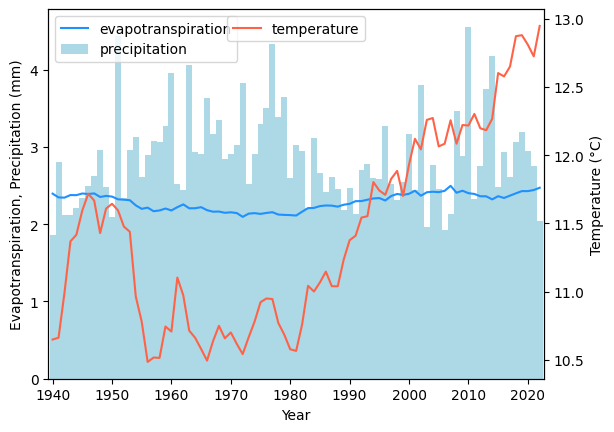

In [84]:
# precipitation (bars)
annual_average["year"] = annual_average["time"].dt.year
annual_average.plot(kind="bar", x="year", y=["precipitation"], width=1, color="lightblue")
# reduce number of year labels 
plt.xticks(rotation=0)
every_nth = 10
plt.xticks(range(0, len(annual_average), every_nth), annual_average["year"][::every_nth])
plt.xlabel("Year")

# evapotranspitarion (blue line)
evapotranspiration = annual_average["evapotranspiration"].rolling(window=5, min_periods=1).mean()
plt.plot(
  evapotranspiration.index,
  evapotranspiration.values,
  label="evapotranspiration",
  color="dodgerblue"
)
plt.gca().set_ylabel("Evapotranspiration, Precipitation (mm)")
plt.gca().legend()

# temperature (red line)
temperature = annual_average["mean_temp"].rolling(window=5, min_periods=1).mean()
ax2 = plt.gca().twinx()
ax2.plot(
  temperature.index,
  temperature.values,
  label="temperature",
  color="tomato"
)
ax2.set_ylabel("Temperature (°C)")
ax2.legend(loc="upper center")

plt.show()